# Clustering (KMeans)

In [141]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs, load_digits
from sklearn.ensemble import IsolationForest
from sklearn.decomposition import PCA

# Data
X, y = make_blobs(n_samples=100, centers=3)
plt.scatter(X[:,0], X[:,1])

In [44]:
model = KMeans(n_clusters = 2, n_init = 10, max_iter = 250)
# n : nombre de clusters
# n_init :  Nombre de fois qu'on initialise 
# max_iter : Nombre d'iteration maximum
# init : strategie d'initialisation (K-Means++ par defaut)

In [46]:
model.fit(X)
model.labels_ # Voir comment sont classé les differents echantillons ou predict(X)

array([1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1], dtype=int32)

In [48]:
# Les centroides 
model.cluster_centers_

array([[-5.64632225,  1.96862351],
       [-1.88705199, -5.44802194]])

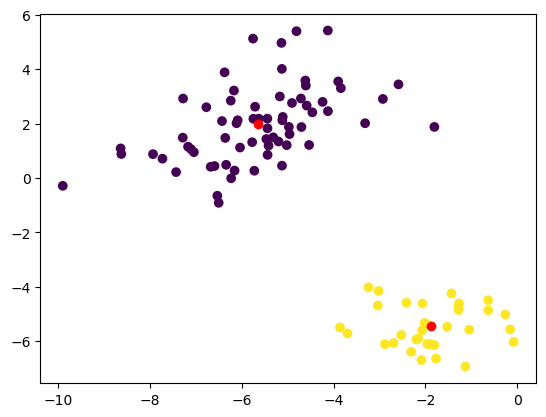

In [50]:
plt.scatter(X[:,0], X[:,1], c = model.predict(X))
plt.scatter(model.cluster_centers_[:,0], model.cluster_centers_[:,1], c = 'r') # Les centroies

In [38]:
# Cout du modele
model.inertia_

183.82918584552183

In [40]:
model.score(X) # Toujoursle cout mais en valeur négative

-183.8291858455218

## Choix du nombre de cluster: Methode Elbow

Text(0, 0.5, 'Cout du modele(Inertia)')

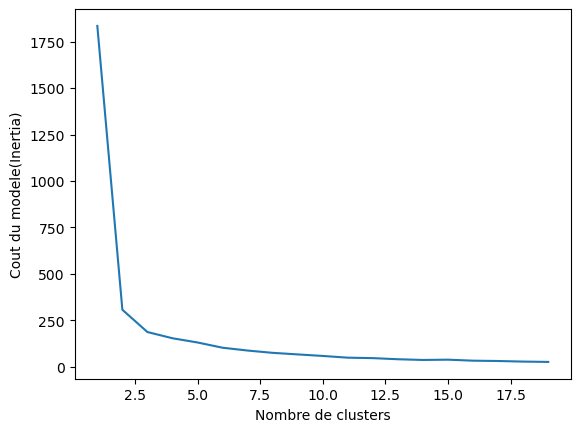

In [42]:
inertia = []
K_range = range(1, 20)
for k in K_range:
    model =  KMeans(n_clusters = k).fit(X)
    inertia.append(model.inertia_)

plt.plot(K_range, inertia)
plt.xlabel('Nombre de clusters')
plt.ylabel('Cout du modele(Inertia)')

# Detection d'anomalies (Isolation forest & Local Outlier Factor)

In [120]:
# Isolation forest: Ensemble d'arbres de decision, et les splits sont les embranchement de cet arbre
X,y = make_blobs(n_samples = 100, centers = 1, cluster_std=0.1)

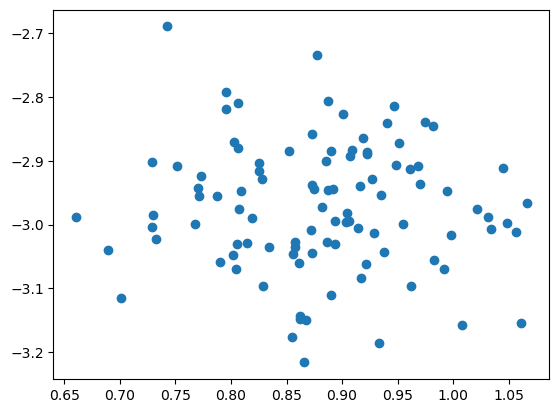

In [122]:
plt.scatter(X[:,0], X[:,1])

In [124]:
model = IsolationForest(contamination=0.01)  # Taux de contamination en params
model.fit(X)

IsolationForest(contamination=0.01)

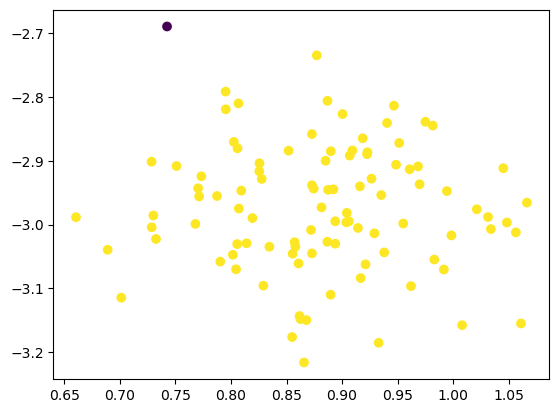

In [132]:
plt.scatter(X[:,0], X[:,1], c = model.predict(X))

# Reduction de dimensionnalité (PCA)

In [143]:
# Dataset digits
digits = load_digits()
images = digits.images
X = digits.data
y = digits.target

X.shape

(1797, 64)

## Visualisation des données: 2D ou 3D
Lorsqu'on veut visualiser les données qui ont plusieurs dimensions, on applique le PCA pour rammener ces dimensiosn à 2 ou 3 pour qu'ils puissent etre visualisé dans un espace comprehensible(2D ou 3D)

In [149]:
model = PCA(n_components=2)
X_reduced = model.fit_transform(X)

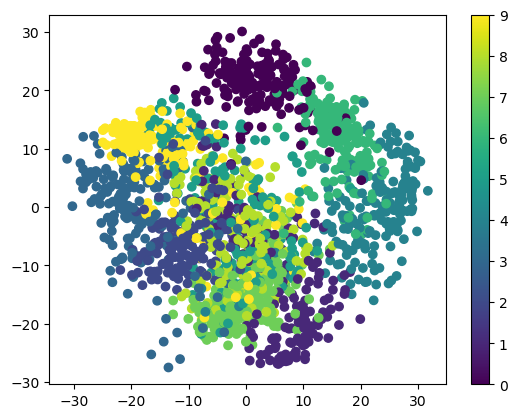

In [151]:
plt.scatter(X_reduced[:,0], X_reduced[:, 1], c=y)
plt.colorbar()

## Compression des données
Lorsqu'on veut rendre l'apprentissage moins complexe sur un dataset avec plusieurs dimensions, il est preferable de de reduire les dimensions en gardant le maximum d'informations(95% à 99%)<br>
Plus on reduit les dimensions plus on perd en qualité des données

In [169]:
# On entraine le modele sur les 64 variables
model = PCA(n_components=64)
X_reduced = model.fit_transform(X)

In [171]:
# On affiches le pourcentage de variance(Information) pour chacune des variable
model.explained_variance_ratio_

array([1.48905936e-01, 1.36187712e-01, 1.17945938e-01, 8.40997942e-02,
       5.78241466e-02, 4.91691032e-02, 4.31598701e-02, 3.66137258e-02,
       3.35324810e-02, 3.07880621e-02, 2.37234084e-02, 2.27269657e-02,
       1.82186331e-02, 1.77385494e-02, 1.46710109e-02, 1.40971560e-02,
       1.31858920e-02, 1.24813782e-02, 1.01771796e-02, 9.05617439e-03,
       8.89538461e-03, 7.97123157e-03, 7.67493255e-03, 7.22903569e-03,
       6.95888851e-03, 5.96081458e-03, 5.75614688e-03, 5.15157582e-03,
       4.89539777e-03, 4.28887968e-03, 3.73606048e-03, 3.53274223e-03,
       3.36683986e-03, 3.28029851e-03, 3.08320884e-03, 2.93778629e-03,
       2.56588609e-03, 2.27742397e-03, 2.22277922e-03, 2.11430393e-03,
       1.89909062e-03, 1.58652907e-03, 1.51159934e-03, 1.40578764e-03,
       1.16622290e-03, 1.07492521e-03, 9.64053065e-04, 7.74630271e-04,
       5.57211553e-04, 4.04330693e-04, 2.09916327e-04, 8.24797098e-05,
       5.25149980e-05, 5.05243719e-05, 3.29961363e-05, 1.24365445e-05,
      

In [173]:
# On fait ensuite la somme cumulée pour voir a combien de pourcentage on est dans les 95-99% d'information conservée
np.cumsum(model.explained_variance_ratio_)

array([0.14890594, 0.28509365, 0.40303959, 0.48713938, 0.54496353,
       0.59413263, 0.6372925 , 0.67390623, 0.70743871, 0.73822677,
       0.76195018, 0.78467714, 0.80289578, 0.82063433, 0.83530534,
       0.84940249, 0.86258838, 0.87506976, 0.88524694, 0.89430312,
       0.9031985 , 0.91116973, 0.91884467, 0.9260737 , 0.93303259,
       0.9389934 , 0.94474955, 0.94990113, 0.95479652, 0.9590854 ,
       0.96282146, 0.96635421, 0.96972105, 0.97300135, 0.97608455,
       0.97902234, 0.98158823, 0.98386565, 0.98608843, 0.98820273,
       0.99010182, 0.99168835, 0.99319995, 0.99460574, 0.99577196,
       0.99684689, 0.99781094, 0.99858557, 0.99914278, 0.99954711,
       0.99975703, 0.99983951, 0.99989203, 0.99994255, 0.99997555,
       0.99998798, 0.99999503, 0.99999804, 0.99999911, 0.99999966,
       1.        , 1.        , 1.        , 1.        ])

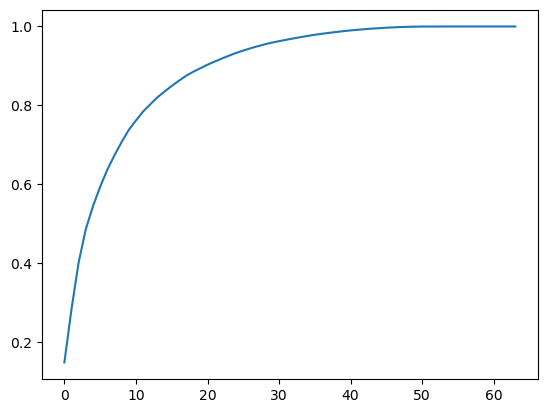

In [175]:
plt.plot(np.cumsum(model.explained_variance_ratio_))

NB: On peut ecrire directement dans le parametre n_component le % qu'on voudrait avoir

In [178]:
model = PCA(n_components = 0.95)
model.fit_transform(X)

array([[ -1.25946645,  21.27488348,  -9.46305462, ...,   3.67072108,
         -0.9436689 ,  -1.13250195],
       [  7.9576113 , -20.76869896,   4.43950604, ...,   2.18261819,
         -0.51022719,   2.31354911],
       [  6.99192297,  -9.95598641,   2.95855808, ...,   4.22882114,
          2.1576573 ,   0.8379578 ],
       ...,
       [ 10.8012837 ,  -6.96025223,   5.59955453, ...,  -3.56866194,
          1.82444444,   3.53885886],
       [ -4.87210009,  12.42395362, -10.17086635, ...,   3.25330054,
          0.95484174,  -0.93895602],
       [ -0.34438963,   6.36554919,  10.77370849, ...,  -3.01636722,
          1.29752723,   2.58810313]])

In [182]:
model.n_components_

29